<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

#### This dataset is owned by New York City Department of Education. This is the total enrollment count for students whose learning preference is remote or blended or missing and who have attended school in person at least once since September 16, 2020. I am interested in analyzing this dataset because there is a major shift from in-person schooling to remote learning since the Covid-19 phase, and I would like to know real statistics behind it.


Data Source: https://catalog.data.gov/dataset/learning-preference-city-remote-learning-as-of-jan-4-2021

About dataset: https://data.cityofnewyork.us/Education/Learning-Preference-City-Remote-Learning-as-of-Jan/k5d2-tkrr

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



### Importing Libraries

#### The first step is to import Pandas and NumPy libraries for data exploration, cleaning and manipulation.

In [ ]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

#### Importing CSV data file into pandas dataframe

Defining the path for reading the CSV file. 

Using Pandas "read_csv" function to read the file into Pandas dataframe.

And by passing the limit to view 5 row in the "head() function.

Similarly, viewing the last 5 rows using the "tail()" function.

In [ ]:
csv_path = '/content/learning_preference.csv'
learning_df = pd.read_csv(csv_path, encoding="utf-8")
learning_df.head(5)

,District,Disaggregation Category,Category,# Total Enrollment,# Blended,% Blended,# Remote,% Remote
0,1,All District,All District,10549,"3,035",28.8%,7514,71.2%
1,1,English Language Learner Status,ELL,908,235,25.9%,673,74.1%
2,1,English Language Learner Status,Not ELL,9641,"2,800",29.0%,6841,71.0%
3,1,Gender,Female,5042,"1,455",28.9%,3587,71.1%
4,1,Gender,Male,5507,"1,580",28.7%,3927,71.3%


In [ ]:
learning_df.tail(5)

,District,Disaggregation Category,Category,# Total Enrollment,# Blended,% Blended,# Remote,% Remote
871,79,Race or Ethnicity,Black,1878,539,28.7%,1339,71.3%
872,79,Race or Ethnicity,Hispanic,2450,642,26.2%,1808,73.8%
873,79,Race or Ethnicity,Multi-Racial,25,5,20.0%,20,80.0%
874,79,Race or Ethnicity,Native American,64,21,32.8%,43,67.2%
875,79,Race or Ethnicity,White,359,95,26.5%,264,73.5%


#### Now previewing the data by calling the dataframe using "info()" function and finding the number of cloumns and rows.

This function provides the total number of rows and columns as well as the datatype of each column. 

Also, we are able to see the count of non-null values, which will help us further investigate the missing, or unexpected values in our dataset.

In [ ]:
learning_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   District                 876 non-null    int64 
 1   Disaggregation Category  876 non-null    object
 2   Category                 876 non-null    object
 3   # Total Enrollment       876 non-null    int64 
 4   # Blended                876 non-null    object
 5   % Blended                876 non-null    object
 6   # Remote                 876 non-null    object
 7   % Remote                 876 non-null    object
dtypes: int64(2), object(6)
memory usage: 54.9+ KB


### The "shape" method provide the row and column count.

In [ ]:
learning_df.shape

(876, 8)

#### Checking the datatype of columns

In [ ]:
learning_df.dtypes

District                    int64
Disaggregation Category    object
Category                   object
# Total Enrollment          int64
# Blended                  object
% Blended                  object
# Remote                   object
% Remote                   object
dtype: object

#### Finding the null values in the dataset

In [ ]:
for column in learning_df.columns:
    print(f"Column {column} has {learning_df[column].isnull().sum()} null values")

Column District has 0 null values
Column Disaggregation Category has 0 null values
Column Category has 0 null values
Column # Total Enrollment has 0 null values
Column # Blended has 0 null values
Column % Blended has 0 null values
Column # Remote has 0 null values
Column % Remote has 0 null values


#### Finding the missing values in the dataset

In [ ]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(learning_df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

#### Rename the column names of the dataframe

In [ ]:
learning_df.columns

Index(['District', 'Disaggregation Category', 'Category', '# Total Enrollment',
       '# Blended', '% Blended', '# Remote', '% Remote'],
      dtype='object')

In [ ]:
learning_df.rename(columns = {'Disaggregation Category':'Disaggregation_Category', '# Total Enrollment':'Total_Enrollment', '# Blended': 'Total_Blended', '% Blended': 'percentage_Blended', '# Remote': 'Total_Remote', '% Remote': 'percentage_Remote'}, inplace = True)
learning_df.columns

Index(['District', 'Disaggregation_Category', 'Category', 'Total_Enrollment',
       'Total_Blended', 'percentage_Blended', 'Total_Remote',
       'percentage_Remote'],
      dtype='object')

#### Convert column names to lower case

In [ ]:
# Map the lowering function to all column names
learning_df.columns = map(str.lower, learning_df.columns)
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,"3,035",28.8%,7514,71.2%
1,1,English Language Learner Status,ELL,908,235,25.9%,673,74.1%
2,1,English Language Learner Status,Not ELL,9641,"2,800",29.0%,6841,71.0%
3,1,Gender,Female,5042,"1,455",28.9%,3587,71.1%
4,1,Gender,Male,5507,"1,580",28.7%,3927,71.3%


#### Remove the comma and percentage sign from the column values

In [ ]:
# To remove comma from column values in Pandas DataFrame:
learning_df['total_blended'] = learning_df['total_blended'].str.replace(',','')
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,3035,28.8%,7514,71.2%
1,1,English Language Learner Status,ELL,908,235,25.9%,673,74.1%
2,1,English Language Learner Status,Not ELL,9641,2800,29.0%,6841,71.0%
3,1,Gender,Female,5042,1455,28.9%,3587,71.1%
4,1,Gender,Male,5507,1580,28.7%,3927,71.3%


In [ ]:
# To remove percentage from column values in Pandas DataFrame:
learning_df['percentage_blended'] = learning_df['percentage_blended'].str.replace('%','')
learning_df['percentage_remote'] = learning_df['percentage_remote'].str.replace('%','')
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,3035,28.8,7514,71.2
1,1,English Language Learner Status,ELL,908,235,25.9,673,74.1
2,1,English Language Learner Status,Not ELL,9641,2800,29.0,6841,71.0
3,1,Gender,Female,5042,1455,28.9,3587,71.1
4,1,Gender,Male,5507,1580,28.7,3927,71.3


#### Convert the "total_blended" and "total_remote" data type from object to integer.

In [ ]:
# Before convert multiple columns to int datatype, check the values if and other values are there which will block the conversion.
# We found that there is "s" in the values which can't be converted to integer. So first fix the issue.

learning_df['total_blended'].values.tolist()
learning_df['total_remote'].values.tolist()

['7514',
 '673',
 '6841',
 '3587',
 '3927',
 '193',
 '390',
 '461',
 '491',
 '503',
 '489',
 '559',
 '587',
 '604',
 '608',
 '628',
 '756',
 '650',
 '595',
 '1751',
 '1126',
 '3108',
 '244',
 '42',
 '19',
 '1224',
 '40009',
 '3230',
 '36779',
 '21189',
 '18820',
 '659',
 '989',
 '1103',
 '1048',
 '1132',
 '1110',
 '1068',
 '1333',
 '1564',
 '1598',
 '7265',
 '7540',
 '7182',
 '6418',
 '10240',
 '6226',
 '14830',
 '1030',
 '265',
 '497',
 '6921',
 '11840',
 '553',
 '11287',
 '6530',
 '5310',
 '197',
 '418',
 '512',
 '454',
 '441',
 '548',
 '570',
 '709',
 '828',
 '819',
 '1322',
 '1880',
 '1582',
 '1560',
 '1203',
 '2653',
 '4607',
 '366',
 '87',
 '245',
 '2679',
 '8005',
 '695',
 '7310',
 '4297',
 '3708',
 '388',
 '394',
 '416',
 '473',
 '465',
 '510',
 '585',
 '663',
 '646',
 '642',
 '665',
 '742',
 '710',
 '706',
 '962',
 '1880',
 '4594',
 '92',
 '85',
 '44',
 '348',
 '6734',
 '496',
 '6238',
 '3060',
 '3674',
 '253',
 '273',
 '317',
 '354',
 '377',
 '394',
 '452',
 '467',
 '468',
 '

#### Replace "s" with 0 in the columns "total_blended" and "total_remote"

In [ ]:
learning_df['total_blended'] = learning_df['total_blended'].replace('s', '0') 
learning_df['total_remote'] = learning_df['total_remote'].replace('s', '0')  
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,3035,28.8,7514,71.2
1,1,English Language Learner Status,ELL,908,235,25.9,673,74.1
2,1,English Language Learner Status,Not ELL,9641,2800,29.0,6841,71.0
3,1,Gender,Female,5042,1455,28.9,3587,71.1
4,1,Gender,Male,5507,1580,28.7,3927,71.3


#### Now convert the "total_blended" and "total_remote" object column to integer data type

In [ ]:
learning_df['total_blended'] = learning_df['total_blended'].astype(str).astype(int)
learning_df['total_remote'] = learning_df['total_remote'].astype(str).astype(int)
learning_df.dtypes

district                    int64
disaggregation_category    object
category                   object
total_enrollment            int64
total_blended               int64
percentage_blended         object
total_remote                int64
percentage_remote          object
dtype: object

#### Now checking the values of the'percentage_blended' and "percentage_remote" columns.

In [ ]:
learning_df['percentage_blended'].values.tolist()
learning_df['percentage_remote'].values.tolist()

['71.2',
 '74.1',
 '71.0',
 '71.1',
 '71.3',
 '52.7',
 '53.6',
 '60.5',
 '66.2',
 '64.2',
 '63.3',
 '71.0',
 '78.0',
 '80.3',
 '80.7',
 '75.0',
 '84.9',
 '78.5',
 '74.7',
 '79.7',
 '71.3',
 '71.5',
 '62.9',
 '73.7',
 '67.9',
 '62.8',
 '67.5',
 '67.2',
 '67.5',
 '68.5',
 '66.4',
 '38.1',
 '37.0',
 '42.2',
 '42.1',
 '43.8',
 '44.0',
 '43.2',
 '50.8',
 '59.4',
 '59.7',
 '79.7',
 '84.0',
 '84.4',
 '83.6',
 '78.1',
 '75.4',
 '75.9',
 '49.0',
 '75.7',
 '72.3',
 '45.3',
 '58.1',
 '58.8',
 '58.1',
 '59.2',
 '56.9',
 '40.5',
 '35.9',
 '43.0',
 '39.6',
 '39.3',
 '46.4',
 '45.5',
 '53.6',
 '61.7',
 '57.5',
 '65.4',
 '76.3',
 '76.1',
 '72.0',
 '61.0',
 '68.4',
 '69.9',
 '43.5',
 '71.3',
 '56.6',
 '41.1',
 '68.2',
 '58.6',
 '69.3',
 '70.2',
 '66.1',
 '59.8',
 '55.3',
 '58.8',
 '61.3',
 '63.8',
 '65.8',
 '67.2',
 '67.9',
 '68.4',
 '67.3',
 '72.6',
 '79.6',
 '79.0',
 '78.5',
 '83.4',
 '68.3',
 '66.9',
 '56.8',
 '68.5',
 '73.3',
 '56.9',
 '72.8',
 '63.1',
 '73.7',
 '71.5',
 '73.9',
 '51.4',
 '55.3',
 

#### Removing the "s" character from the columns so they can be converted from object to integer data type.

In [ ]:
learning_df['percentage_blended'] = learning_df['percentage_blended'].replace('s', '0') 
learning_df['percentage_remote'] = learning_df['percentage_remote'].replace('s', '0')  
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,3035,28.8,7514,71.2
1,1,English Language Learner Status,ELL,908,235,25.9,673,74.1
2,1,English Language Learner Status,Not ELL,9641,2800,29.0,6841,71.0
3,1,Gender,Female,5042,1455,28.9,3587,71.1
4,1,Gender,Male,5507,1580,28.7,3927,71.3


#### Now convert the data types of the 'percentage_blended' and 'percentage_remote' columns to integer




In [ ]:
learning_df['percentage_blended'] = learning_df['percentage_blended'].astype(str).astype(float)
learning_df['percentage_remote'] = learning_df['percentage_remote'].astype(str).astype(float)
learning_df.dtypes

district                     int64
disaggregation_category     object
category                    object
total_enrollment             int64
total_blended                int64
percentage_blended         float64
total_remote                 int64
percentage_remote          float64
dtype: object

### Convert the dataframe values to all lower case.

In [ ]:
# Convert the value of 'Name' column to lowercase
learning_df['disaggregation_category'] = learning_df['disaggregation_category'].map(str.lower)
learning_df['category'] = learning_df['category'].map(str.lower)
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,all district,all district,10549,3035,28.8,7514,71.2
1,1,english language learner status,ell,908,235,25.9,673,74.1
2,1,english language learner status,not ell,9641,2800,29.0,6841,71.0
3,1,gender,female,5042,1455,28.9,3587,71.1
4,1,gender,male,5507,1580,28.7,3927,71.3


#### Checking the duplicates in the dataframe.

In [ ]:
learning_df.duplicated().sum()
learning_df.drop_duplicates(inplace=True)
learning_df.shape

(876, 8)

#### Applying GroupBy funtion on the dataframe by "Category"

In [142]:
enrollment_df = learning_df.groupby("category")["total_enrollment"].sum()
blended_df = learning_df.groupby("category")["total_blended"].sum()
remote_df = learning_df.groupby("category")["total_remote"].sum()
enrollment_df

category
01                  62138
02                  62450
03                  64586
04                  64945
05                  66412
06                  65746
07                  66577
08                  68996
09                  77690
0k                  59223
10                  80644
11                  68454
12                  69406
all district       908887
asian              169210
black              192245
ell                134180
female             438303
hispanic           375048
male               470584
multi-racial        12181
native american     10881
not ell            774707
pk                  31620
unknown              4730
white              144592
Name: total_enrollment, dtype: int64

#### Convert the Groupby to a DataFrame with to_frame()

In [143]:
enrollment_df = enrollment_df.to_frame()
blended_df = blended_df.to_frame()
remote_df = remote_df.to_frame()
enrollment_df

,total_enrollment
category,
01,62138
02,62450
03,64586
04,64945
05,66412
06,65746
07,66577
08,68996
09,77690


In [131]:
category_df1 = learning_df.groupby("category")["percentage_blended"].mean()
category_df1.to_frame()

,percentage_blended
category,
01,43.293939
02,42.236364
03,40.412121
04,39.172727
05,38.012121
06,32.758824
07,29.211765
08,30.611765
09,24.608824


#### Add String to Each Value in Column Based on Condition.

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



## **Matplotlib Visualizations - Part 1**

In [144]:
enrollment_df.head()

,total_enrollment
category,
01,62138
02,62450
03,64586
04,64945
05,66412


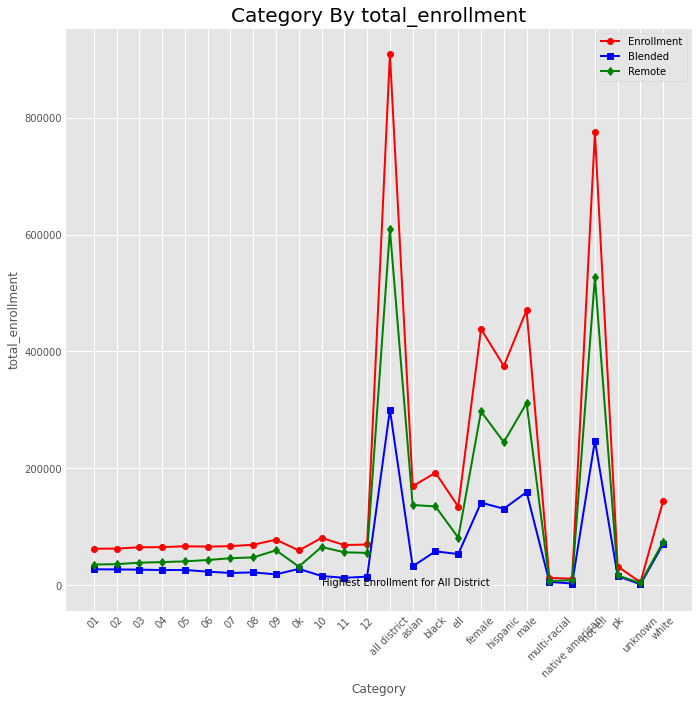

In [149]:
# Use the style ggplot
plt.style.use('ggplot')

# Plot lines
plt.plot(enrollment_df.index, enrollment_df.values, color="red", linewidth=2, linestyle='-', marker='o', label="Enrollment")
plt.plot(blended_df.index, blended_df.values, color="blue", linewidth=2, linestyle='-', marker='s', label="Blended")
plt.plot(remote_df.index, remote_df.values, color="green", linewidth=2, linestyle='-', marker='d', label="Remote")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Category')
plt.ylabel('total_enrollment')
plt.title('Category By total_enrollment', fontsize=20)
plt.text(10, 3, "Highest Enrollment for All District")

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
category_df1.head()

category
01    818.454545
02    809.030303
03    798.151515
04    777.969697
05    783.939394
Name: total_blended, dtype: float64

<BarContainer object of 26 artists>

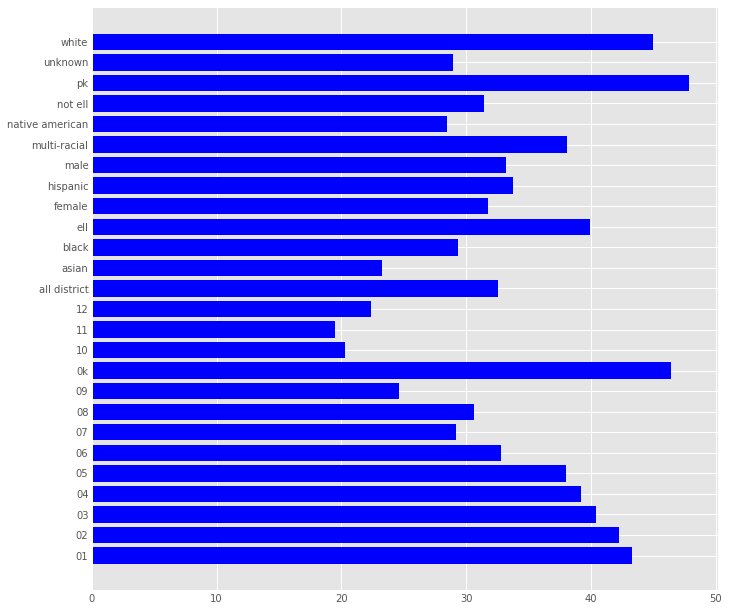

In [135]:
plt.barh(category_df1.index, category_df1.values, color='blue')

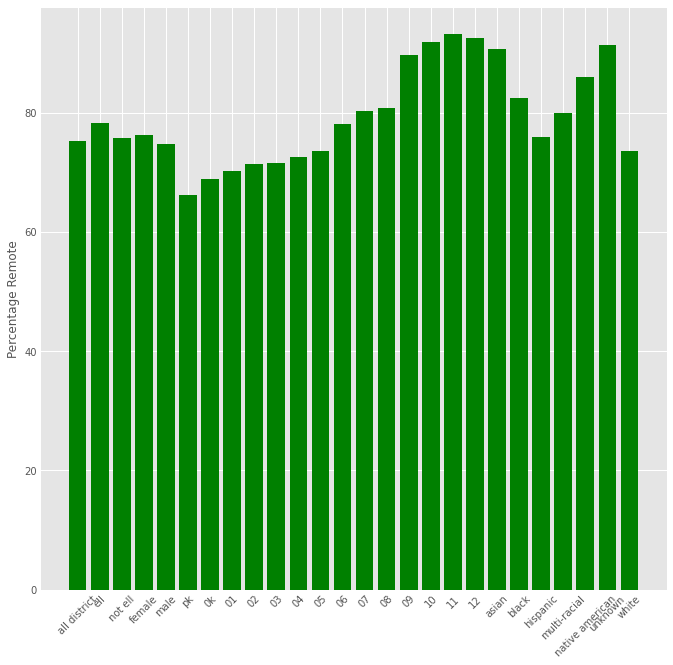

In [137]:
plt.bar(learning_df.category, learning_df.percentage_remote, color='green')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel('Percentage Remote')
plt.show()

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  